# 1단계. 데이터 전처리

### 데이터 불러오기

In [1]:
import pandas as pd
from pytimekr import pytimekr
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce

In [2]:
data_set=pd.read_excel('preprocessed_두리발_2020년1월_2022년7월_콜상세내역.xlsx')

In [3]:
data=data_set.copy()

In [4]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,하차일시,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일
0,2020-01-01 00:00:37.293,1,부산광역시 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,2020-01-01 02:15:23,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True
1,2020-01-01 00:07:01.397,1,부산광역시 연제구,부산광역시 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,2020-01-01 03:20:17,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True
2,2020-01-01 00:21:50.623,1,부산광역시 중구,부산광역시 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,2020-01-01 02:37:22,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True
3,2020-01-01 00:23:23.330,1,부산광역시 북구,부산광역시 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,2020-01-01 03:00:47,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True
4,2020-01-01 00:34:42.987,1,부산광역시 해운대구,부산광역시 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,2020-01-01 03:45:13,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,2022-07-31 22:20:35,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,2022-07-31 22:53:26,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,2022-07-31 23:25:51,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,2022-07-31 23:28:10,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False


### 잘못 표기된 데이터 확인 및 삭제

- 접수일시, 승차일시, 배차일시, 하차일시 년도 값 잘못 표기된 것 확인하기

In [5]:
import pandas as pd

# 날짜 컬럼을 datetime 타입으로 변환 (필요한 경우)
data['접수일시'] = pd.to_datetime(data['접수일시'])
data['배차일시'] = pd.to_datetime(data['배차일시'])
data['승차일시'] = pd.to_datetime(data['승차일시'])
data['하차일시'] = pd.to_datetime(data['하차일시'])

# 2020년부터 2022년 사이가 아닌 데이터 필터링
filtered_df = data[
    (data['접수일시'] < '2020-01-01') | (data['접수일시'] > '2022-12-31') |
    (data['배차일시'] < '2020-01-01') | (data['배차일시'] > '2022-12-31') |
    (data['승차일시'] < '2020-01-01') | (data['승차일시'] > '2022-12-31') |
    (data['하차일시'] < '2020-01-01') | (data['하차일시'] > '2022-12-31')
]

# 결과 출력
print(filtered_df)

Empty DataFrame
Columns: [접수일시, 월, 출발지역, 목적지역, 호출지경도, 호출지위도, 목적지경도, 목적지위도, 배차일시, 승차일시, 하차일시, 요금, 배차대기시간(분), 승차대기시간(분), 총대기시간(분), 승차시간(분), 직선거리(km), 주말, 공휴일]
Index: []


- 배차일시 날짜보다 승차일시가 더 빠른 데이터 알아보기

In [6]:
# 날짜 컬럼을 datetime 타입으로 변환 (필요한 경우)
data['배차일시'] = pd.to_datetime(data['배차일시'])
data['승차일시'] = pd.to_datetime(data['승차일시'])

# 배차일시가 승차일시보다 후인 데이터 필터링
invalid_dates_df = data[data['승차일시'] < data['배차일시']]

# 결과 출력
print(invalid_dates_df)

Empty DataFrame
Columns: [접수일시, 월, 출발지역, 목적지역, 호출지경도, 호출지위도, 목적지경도, 목적지위도, 배차일시, 승차일시, 하차일시, 요금, 배차대기시간(분), 승차대기시간(분), 총대기시간(분), 승차시간(분), 직선거리(km), 주말, 공휴일]
Index: []


- 승차대기시간 이상값 확인

In [7]:
# 승차대기시간(분)에서 1보다 작은 값을 제외하고 필터링
filtered_df = data[data['승차대기시간(분)'] < 1]

# 결과 출력
filtered_df

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,하차일시,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일
237,2020-01-01 15:48:48.033,1,부산광역시 동구,부산광역시 동래구,496933,282839,498875,289257,2020-01-01 15:49:59.160,2020-01-01 15:50:38,2020-01-01 16:17:49,3200,1.185450,0.647333,1.832783,27.183333,12982.446896,False,True
322,2020-01-01 19:28:19.207,1,부산광역시 해운대구,부산광역시 동구,502028,288303,496944,282392,2020-01-01 19:31:16.880,2020-01-01 19:31:58,2020-01-01 19:52:52,3700,2.961217,0.685333,3.646550,20.900000,15311.755033,False,True
524,2020-01-02 09:05:15.733,1,부산광역시 영도구,부산광역시 중구,497354,275587,494559,278144,2020-01-02 09:05:26.843,2020-01-02 09:05:30,2020-01-02 09:05:31,0,0.185167,0.052617,0.237783,0.016667,9068.341981,False,False
678,2020-01-02 11:08:16.337,1,부산광역시 사상구,부산광역시 사하구,489716,282830,488745,273069,2020-01-02 11:08:16.630,2020-01-02 11:08:29,2020-01-02 11:28:57,3700,0.004883,0.206167,0.211050,20.466667,10561.619952,False,False
775,2020-01-02 12:00:22.160,1,부산광역시 서구,경상남도 김해시,492822,280552,481169,292511,2020-01-02 12:00:22.470,2020-01-02 12:00:31,2020-01-02 12:34:49,5600,0.005167,0.142167,0.147333,34.300000,12823.201740,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654388,2022-07-30 15:55:25.923,7,부산광역시 해운대구,부산광역시 영도구,501859,288721,498389,276871,2022-07-30 15:57:09.923,2022-07-30 15:57:48,2022-07-30 16:33:05,5200,1.733333,0.634617,2.367950,35.283333,13656.220696,True,False
654493,2022-07-30 21:32:19.470,7,부산광역시 동래구,부산광역시 동래구,498703,290283,500243,290125,2022-07-30 21:35:04.047,2022-07-30 21:35:27,2022-07-30 21:47:01,1800,2.742950,0.382550,3.125500,11.566667,12654.153967,True,False
654635,2022-07-31 10:53:58.983,7,부산광역시 해운대구,부산광역시 기장군,502411,291191,513006,301986,2022-07-31 10:53:59.373,2022-07-31 10:54:42,2022-07-31 11:31:34,5500,0.006500,0.710450,0.716950,36.866667,8324.696737,True,False
654752,2022-07-31 13:52:23.087,7,부산광역시 북구,부산광역시 북구,491849,290579,492610,290392,2022-07-31 13:59:03.850,2022-07-31 13:59:24,2022-07-31 14:07:20,1800,6.679383,0.335833,7.015217,7.933333,17365.611103,True,False


In [8]:
# 승차대기시간(분)에서 1보다 작은 값을 제외하고 필터링
data = data[data['승차대기시간(분)'] >= 1]

# 결과 출력
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,하차일시,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일
0,2020-01-01 00:00:37.293,1,부산광역시 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,2020-01-01 02:15:23,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True
1,2020-01-01 00:07:01.397,1,부산광역시 연제구,부산광역시 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,2020-01-01 03:20:17,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True
2,2020-01-01 00:21:50.623,1,부산광역시 중구,부산광역시 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,2020-01-01 02:37:22,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True
3,2020-01-01 00:23:23.330,1,부산광역시 북구,부산광역시 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,2020-01-01 03:00:47,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True
4,2020-01-01 00:34:42.987,1,부산광역시 해운대구,부산광역시 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,2020-01-01 03:45:13,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,2022-07-31 22:20:35,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,2022-07-31 22:53:26,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,2022-07-31 23:25:51,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,2022-07-31 23:28:10,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False


- 배차대기시간(분)에서 720분보다 작은 값을 제외하고 필터링

In [9]:
# 배차대기시간(분)에서 720분보다 작은 값을 제외하고 필터링
filtered_df = data[data['배차대기시간(분)'] >= 720]

# 결과 출력
filtered_df

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,하차일시,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일


- 접수시간 생성

In [10]:
data['접수시간']=data['접수일시'].dt.hour

C:\Users\user\AppData\Local\Temp\ipykernel_22112\1763112670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['접수시간']=data['접수일시'].dt.hour


In [11]:
data['접수시간']

0          0
1          0
2          0
3          0
4          0
          ..
654869    21
654870    21
654871    21
654872    21
654873    23
Name: 접수시간, Length: 651337, dtype: int32

- 요일 생성하기

In [12]:
data['요일']='월'
data.loc[data['승차일시'].dt.weekday==1,'요일']='화'
data.loc[data['승차일시'].dt.weekday==2,'요일']='수'
data.loc[data['승차일시'].dt.weekday==3,'요일']='목'
data.loc[data['승차일시'].dt.weekday==4,'요일']='금'
data.loc[data['승차일시'].dt.weekday==5,'요일']='토'
data.loc[data['승차일시'].dt.weekday==6,'요일']='일'

C:\Users\user\AppData\Local\Temp\ipykernel_22112\861225814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['요일']='월'


In [13]:
data['요일']=data['승차일시'].dt.weekday

C:\Users\user\AppData\Local\Temp\ipykernel_22112\4118538062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['요일']=data['승차일시'].dt.weekday


In [14]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일,접수시간,요일
0,2020-01-01 00:00:37.293,1,부산광역시 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,...,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True,0,2
1,2020-01-01 00:07:01.397,1,부산광역시 연제구,부산광역시 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,...,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True,0,2
2,2020-01-01 00:21:50.623,1,부산광역시 중구,부산광역시 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,...,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True,0,2
3,2020-01-01 00:23:23.330,1,부산광역시 북구,부산광역시 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,...,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True,0,2
4,2020-01-01 00:34:42.987,1,부산광역시 해운대구,부산광역시 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,...,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False,21,6
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False,21,6
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,...,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False,21,6
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False,21,6


In [15]:
time0=data['승차일시'][0]-data['승차일시'][0]
data=data.drop(data[(data['배차일시']-data['접수일시'])<=time0].index,axis=0)
data=data.drop(data[(data['승차일시']-data['배차일시'])<=time0].index,axis=0)
data=data.drop(data[(data['하차일시']-data['승차일시'])<=time0].index,axis=0)
data=data.drop(data[data['총대기시간(분)']>=12*60].index,axis=0)

In [16]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일,접수시간,요일
0,2020-01-01 00:00:37.293,1,부산광역시 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,...,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True,0,2
1,2020-01-01 00:07:01.397,1,부산광역시 연제구,부산광역시 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,...,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True,0,2
2,2020-01-01 00:21:50.623,1,부산광역시 중구,부산광역시 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,...,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True,0,2
3,2020-01-01 00:23:23.330,1,부산광역시 북구,부산광역시 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,...,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True,0,2
4,2020-01-01 00:34:42.987,1,부산광역시 해운대구,부산광역시 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,...,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False,21,6
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False,21,6
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,...,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False,21,6
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False,21,6


### 이상치 제거

In [17]:
import pandas as pd

# IQR 계산
Q1 = data['총대기시간(분)'].quantile(0.25)
Q3 = data['총대기시간(분)'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
filtered_data = data[(data['총대기시간(분)'] >= lower_bound) & (data['총대기시간(분)'] <= upper_bound)]

# 결과 출력
print(f"Original data size: {data.shape}")
print(f"Filtered data size: {filtered_data.shape}")
filtered_data

Original data size: (651331, 21)
Filtered data size: (638315, 21)


,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일,접수시간,요일
12,2020-01-01 05:06:44.297,1,부산광역시 사상구,부산광역시 사상구,489507,285817,491872,284227,2020-01-01 05:17:46.503,2020-01-01 05:48:05,...,1900,11.036767,30.308283,41.345050,17.383333,3210.950152,False,True,5,2
13,2020-01-01 05:29:11.703,1,부산광역시 해운대구,경상남도 양산시,506696,285824,490101,301659,2020-01-01 05:29:51.013,2020-01-01 06:05:49,...,9300,0.655167,35.966450,36.621617,54.333333,3724.877799,False,True,5,2
15,2020-01-01 05:32:39.097,1,부산광역시 연제구,부산광역시 부산진구,498495,288086,495760,284851,2020-01-01 05:34:44.470,2020-01-01 05:51:35,...,2100,2.089550,16.842167,18.931717,10.366667,359.389316,False,True,5,2
18,2020-01-01 05:57:06.427,1,부산광역시 연제구,부산광역시 사하구,498923,286584,487815,279035,2020-01-01 06:58:54.043,2020-01-01 07:19:54,...,5500,61.793600,20.999283,82.792883,35.283333,5120.670073,False,True,5,2
19,2020-01-01 06:21:30.313,1,부산광역시 부산진구,부산광역시 금정구,493723,285383,499594,297423,2020-01-01 06:56:44.463,2020-01-01 07:13:11,...,5500,35.235833,16.442283,51.678117,35.316667,16660.328522,False,True,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False,21,6
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False,21,6
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,...,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False,21,6
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False,21,6


In [18]:
import pandas as pd

# IQR 계산
Q1 = data['총대기시간(분)'].quantile(0.25)
Q3 = data['총대기시간(분)'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
filtered_data = data[(data['총대기시간(분)'] >= lower_bound) & (data['총대기시간(분)'] <= upper_bound)]

# 결과 출력
print(f"Original data size: {data.shape}")
print(f"Filtered data size: {filtered_data.shape}")
filtered_data

Original data size: (651331, 21)
Filtered data size: (638315, 21)


,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일,접수시간,요일
12,2020-01-01 05:06:44.297,1,부산광역시 사상구,부산광역시 사상구,489507,285817,491872,284227,2020-01-01 05:17:46.503,2020-01-01 05:48:05,...,1900,11.036767,30.308283,41.345050,17.383333,3210.950152,False,True,5,2
13,2020-01-01 05:29:11.703,1,부산광역시 해운대구,경상남도 양산시,506696,285824,490101,301659,2020-01-01 05:29:51.013,2020-01-01 06:05:49,...,9300,0.655167,35.966450,36.621617,54.333333,3724.877799,False,True,5,2
15,2020-01-01 05:32:39.097,1,부산광역시 연제구,부산광역시 부산진구,498495,288086,495760,284851,2020-01-01 05:34:44.470,2020-01-01 05:51:35,...,2100,2.089550,16.842167,18.931717,10.366667,359.389316,False,True,5,2
18,2020-01-01 05:57:06.427,1,부산광역시 연제구,부산광역시 사하구,498923,286584,487815,279035,2020-01-01 06:58:54.043,2020-01-01 07:19:54,...,5500,61.793600,20.999283,82.792883,35.283333,5120.670073,False,True,5,2
19,2020-01-01 06:21:30.313,1,부산광역시 부산진구,부산광역시 금정구,493723,285383,499594,297423,2020-01-01 06:56:44.463,2020-01-01 07:13:11,...,5500,35.235833,16.442283,51.678117,35.316667,16660.328522,False,True,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False,21,6
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False,21,6
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,...,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False,21,6
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False,21,6


In [19]:
data = filtered_data

- 거리에 따른 탑승시간 맞지 않는 이상치 제거

In [20]:
data.columns

Index(['접수일시', '월', '출발지역', '목적지역', '호출지경도', '호출지위도', '목적지경도', '목적지위도', '배차일시',
       '승차일시', '하차일시', '요금', '배차대기시간(분)', '승차대기시간(분)', '총대기시간(분)', '승차시간(분)',
       '직선거리(km)', '주말', '공휴일', '접수시간', '요일'],
      dtype='object')

In [21]:
data['거리']=((data['호출지경도']-data['목적지경도'])**2+(data['호출지위도']-data['목적지위도'])**2)**0.5

C:\Users\user\AppData\Local\Temp\ipykernel_22112\2313901543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['거리']=((data['호출지경도']-data['목적지경도'])**2+(data['호출지위도']-data['목적지위도'])**2)**0.5


In [23]:
import matplotlib.pyplot as plt

plt.scatter(data['거리'],data['승차시간(분)'].dt.total_seconds()/60,alpha=0.1)
plt.ylim(0,100)
plt.xlim(0,15000)

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
plt.scatter(data['거리'],data['승차시간(분)'].dt.total_seconds()/60,alpha=0.002)
plt.ylim(0,100)
plt.xlim(0,15000)

- 성능을 높이기 위해 구간화

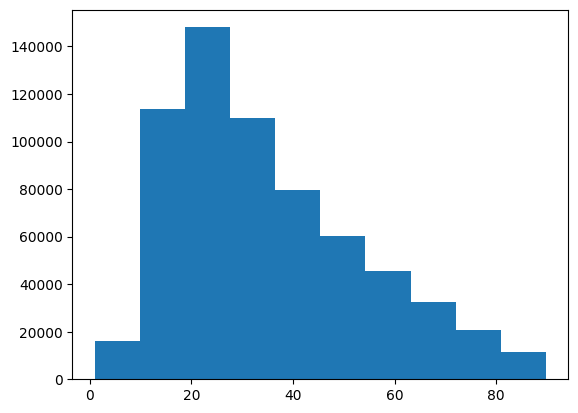

In [24]:
plt.hist(data['총대기시간(분)'])
plt.show()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing fr

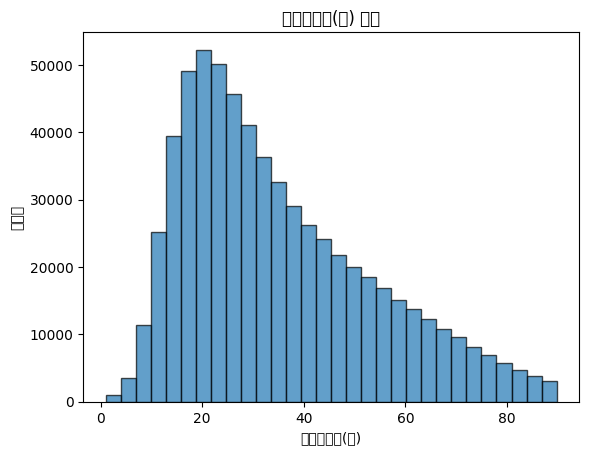

In [25]:
# '총대기시간(분)' 분포 확인
plt.hist(data['총대기시간(분)'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('총대기시간(분)')
plt.ylabel('빈도수')
plt.title('총대기시간(분) 분포')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x20e4ecd65e0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e4ecd6b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e4ecd6340>],
 'medians': [<matplotlib.lines.Line2D at 0x20e4edbc0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e4edbc370>],
 'means': []}

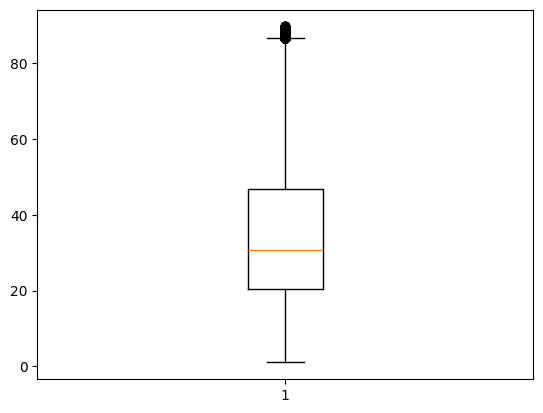

In [26]:
fig, ax = plt.subplots()
ax.boxplot(data['총대기시간(분)'])

구간 경계값:
[ 1.0085     20.45025    30.62528333 46.926975   89.7715    ]
각 구간의 비율:
대기시간_구간
짧다(20분 이내)       0.250000
보통이다(30분 정도)     0.250000
너무 길다(50분 이상)    0.250000
길다(40분 정도)       0.249999
Name: proportion, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_22112\1823245663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['대기시간_구간'], bins = pd.qcut(data['총대기시간(분)'], 4, labels=['짧다(20분 이내)', '보통이다(30분 정도)', '길다(40분 정도)', '너무 길다(50분 이상)'], retbins=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.

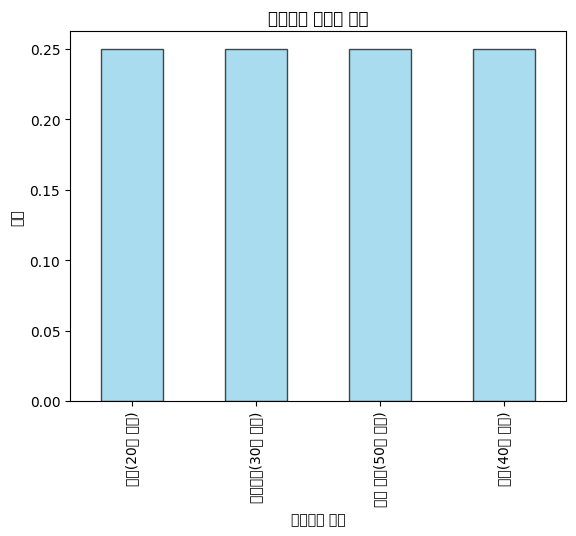

In [27]:
# '총대기시간(분)'을 4개의 구간으로 나누기
data['대기시간_구간'], bins = pd.qcut(data['총대기시간(분)'], 4, labels=['짧다(20분 이내)', '보통이다(30분 정도)', '길다(40분 정도)', '너무 길다(50분 이상)'], retbins=True)

# 구간 경계값 출력
print("구간 경계값:")
print(bins)

# 각 구간의 비율 계산
구간_비율 = data['대기시간_구간'].value_counts(normalize=True)

# 결과 출력
print("각 구간의 비율:")
print(구간_비율)

# 각 구간의 비율 시각화
구간_비율.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('대기시간 구간')
plt.ylabel('비율')
plt.title('대기시간 구간별 비율')
plt.show()

In [28]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일,접수시간,요일,거리,대기시간_구간
12,2020-01-01 05:06:44.297,1,부산광역시 사상구,부산광역시 사상구,489507,285817,491872,284227,2020-01-01 05:17:46.503,2020-01-01 05:48:05,...,30.308283,41.345050,17.383333,3210.950152,False,True,5,2,2849.793852,길다(40분 정도)
13,2020-01-01 05:29:11.703,1,부산광역시 해운대구,경상남도 양산시,506696,285824,490101,301659,2020-01-01 05:29:51.013,2020-01-01 06:05:49,...,35.966450,36.621617,54.333333,3724.877799,False,True,5,2,22937.769072,길다(40분 정도)
15,2020-01-01 05:32:39.097,1,부산광역시 연제구,부산광역시 부산진구,498495,288086,495760,284851,2020-01-01 05:34:44.470,2020-01-01 05:51:35,...,16.842167,18.931717,10.366667,359.389316,False,True,5,2,4236.207030,짧다(20분 이내)
18,2020-01-01 05:57:06.427,1,부산광역시 연제구,부산광역시 사하구,498923,286584,487815,279035,2020-01-01 06:58:54.043,2020-01-01 07:19:54,...,20.999283,82.792883,35.283333,5120.670073,False,True,5,2,13430.378438,너무 길다(50분 이상)
19,2020-01-01 06:21:30.313,1,부산광역시 부산진구,부산광역시 금정구,493723,285383,499594,297423,2020-01-01 06:56:44.463,2020-01-01 07:13:11,...,16.442283,51.678117,35.316667,16660.328522,False,True,6,2,13395.157371,너무 길다(50분 이상)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,19.889217,41.235333,26.200000,3817.166239,True,False,21,6,6669.457624,길다(40분 정도)
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,28.619883,49.372783,28.300000,2075.931412,True,False,21,6,5792.689617,너무 길다(50분 이상)
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,...,15.395883,48.949617,50.116667,16842.972906,True,False,21,6,19692.733787,너무 길다(50분 이상)
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,24.685383,84.516000,10.300000,16591.277118,True,False,21,6,934.400342,너무 길다(50분 이상)


### 불필요한 열 제거

In [29]:
data.columns

Index(['접수일시', '월', '출발지역', '목적지역', '호출지경도', '호출지위도', '목적지경도', '목적지위도', '배차일시',
       '승차일시', '하차일시', '요금', '배차대기시간(분)', '승차대기시간(분)', '총대기시간(분)', '승차시간(분)',
       '직선거리(km)', '주말', '공휴일', '접수시간', '요일', '거리', '대기시간_구간'],
      dtype='object')

In [30]:
data=data.drop(['배차일시', '승차일시', '하차일시', '요금', '배차대기시간(분)', '승차대기시간(분)', '승차시간(분)', '직선거리(km)'],axis=1)

In [31]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,총대기시간(분),주말,공휴일,접수시간,요일,거리,대기시간_구간
12,2020-01-01 05:06:44.297,1,부산광역시 사상구,부산광역시 사상구,489507,285817,491872,284227,41.345050,False,True,5,2,2849.793852,길다(40분 정도)
13,2020-01-01 05:29:11.703,1,부산광역시 해운대구,경상남도 양산시,506696,285824,490101,301659,36.621617,False,True,5,2,22937.769072,길다(40분 정도)
15,2020-01-01 05:32:39.097,1,부산광역시 연제구,부산광역시 부산진구,498495,288086,495760,284851,18.931717,False,True,5,2,4236.207030,짧다(20분 이내)
18,2020-01-01 05:57:06.427,1,부산광역시 연제구,부산광역시 사하구,498923,286584,487815,279035,82.792883,False,True,5,2,13430.378438,너무 길다(50분 이상)
19,2020-01-01 06:21:30.313,1,부산광역시 부산진구,부산광역시 금정구,493723,285383,499594,297423,51.678117,False,True,6,2,13395.157371,너무 길다(50분 이상)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,41.235333,True,False,21,6,6669.457624,길다(40분 정도)
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,49.372783,True,False,21,6,5792.689617,너무 길다(50분 이상)
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,48.949617,True,False,21,6,19692.733787,너무 길다(50분 이상)
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,84.516000,True,False,21,6,934.400342,너무 길다(50분 이상)


### SHAP를 위한 간단 인코딩

In [1]:
import pandas as pd
import numpy as np
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 데이터 준비
data_encoded = data.copy()  # data 변수를 사용

# 접수일시에서 초와 년도 제거
data_encoded['접수일시'] = data_encoded['접수일시'].dt.strftime('%m-%d %H:%M')

# 주말과 공휴일을 숫자로 변환 (True: 1, False: 0)
data_encoded['주말'] = data_encoded['주말'].astype(int)
data_encoded['공휴일'] = data_encoded['공휴일'].astype(int)

# 범주형 변수 레이블 인코딩
label_encoders = {}
categorical_columns = ['출발지역', '목적지역', '접수일시', '대기시간_구간']  # 범주형 변수 목록

for col in categorical_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

NameError: name 'data' is not defined

In [28]:
data_encoded

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,총대기시간(분),주말,공휴일,접수시간,요일,거리
12,21,1,29,42,489507,285817,491872,284227,41.345050,0,1,5,2,2849.793852
13,22,1,36,9,506696,285824,490101,301659,36.621617,0,1,5,2,22937.769072
15,23,1,33,40,498495,288086,495760,284851,18.931717,0,1,5,2,4236.207030
18,25,1,33,43,498923,286584,487815,279035,82.792883,0,1,5,2,13430.378438
19,33,1,27,35,493723,285383,499594,297423,51.678117,0,1,6,2,13395.157371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,159068,7,26,49,501300,288679,507568,286400,41.235333,1,0,21,6,6669.457624
654870,159072,7,36,49,506206,292715,509093,287693,49.372783,1,0,21,6,5792.689617
654871,159074,7,36,36,506180,285160,506010,304852,48.949617,1,0,21,6,19692.733787
654872,159075,7,36,45,502745,286538,501997,285978,84.516000,1,0,21,6,934.400342


In [29]:
data_encoded

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,총대기시간(분),주말,공휴일,접수시간,요일,거리
12,21,1,29,42,489507,285817,491872,284227,41.345050,0,1,5,2,2849.793852
13,22,1,36,9,506696,285824,490101,301659,36.621617,0,1,5,2,22937.769072
15,23,1,33,40,498495,288086,495760,284851,18.931717,0,1,5,2,4236.207030
18,25,1,33,43,498923,286584,487815,279035,82.792883,0,1,5,2,13430.378438
19,33,1,27,35,493723,285383,499594,297423,51.678117,0,1,6,2,13395.157371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,159068,7,26,49,501300,288679,507568,286400,41.235333,1,0,21,6,6669.457624
654870,159072,7,36,49,506206,292715,509093,287693,49.372783,1,0,21,6,5792.689617
654871,159074,7,36,36,506180,285160,506010,304852,48.949617,1,0,21,6,19692.733787
654872,159075,7,36,45,502745,286538,501997,285978,84.516000,1,0,21,6,934.400342


### X,Y 변수 분리

In [30]:
# X 변수와 Y 변수 분리
Y = data_encoded['총대기시간(분)']
data_encoded = data_encoded.drop(columns=['총대기시간(분)'])

In [31]:
data_encoded

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일,거리
12,21,1,29,42,489507,285817,491872,284227,0,1,5,2,2849.793852
13,22,1,36,9,506696,285824,490101,301659,0,1,5,2,22937.769072
15,23,1,33,40,498495,288086,495760,284851,0,1,5,2,4236.207030
18,25,1,33,43,498923,286584,487815,279035,0,1,5,2,13430.378438
19,33,1,27,35,493723,285383,499594,297423,0,1,6,2,13395.157371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,159068,7,26,49,501300,288679,507568,286400,1,0,21,6,6669.457624
654870,159072,7,36,49,506206,292715,509093,287693,1,0,21,6,5792.689617
654871,159074,7,36,36,506180,285160,506010,304852,1,0,21,6,19692.733787
654872,159075,7,36,45,502745,286538,501997,285978,1,0,21,6,934.400342


### 변수 스케일링

- 이상치 많은지 확인 => 많다면 Robustscaler 사용!
- => 결과 : 이상치 많았음 (아래 참고)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# 데이터 프레임에서 수치형 데이터 추출
numerical_data = data.select_dtypes(include=[np.number])

# 이상치 개수 확인
outlier_counts = {}
for column in numerical_data.columns:
    q1 = numerical_data[column].quantile(0.25)
    q3 = numerical_data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = numerical_data[(numerical_data[column] < lower_bound) | (numerical_data[column] > upper_bound)]
    outlier_counts[column] = len(outliers)

# 이상치 개수 출력
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Variable', 'Outlier Count'])
outlier_counts_df

,Variable,Outlier Count
0,월,0
1,호출지경도,6909
2,호출지위도,13958
3,목적지경도,13005
4,목적지위도,20902
5,총대기시간(분),3237
6,접수시간,5952
7,요일,0
8,거리,26760


C:\Users\user\AppData\Local\Temp\ipykernel_18724\1652175516.py:7: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_18724\1652175516.py:7: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_18724\1652175516.py:7: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_18724\1652175516.py:7: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_18724\1652175516.py:7: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_18724\1652175516.py:7: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\

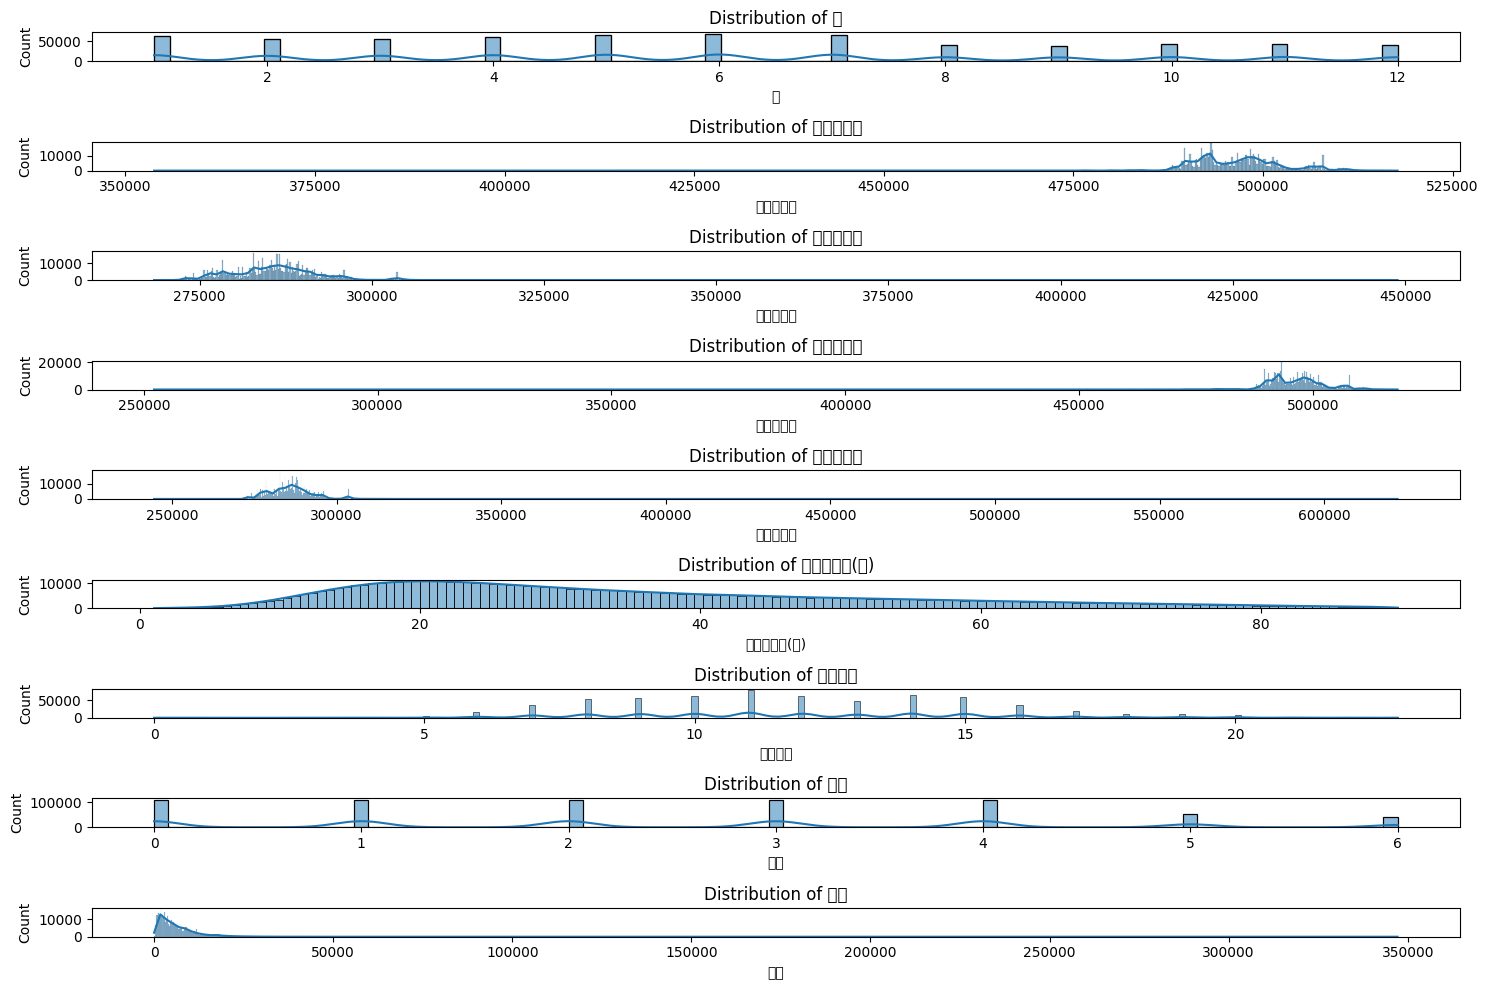

In [33]:
# 정규분포 시각화
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_data.columns):
    plt.subplot(len(numerical_data.columns), 1, i + 1)
    sns.histplot(numerical_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

1) 월:
데이터가 균등하게 분포되어 있으며, 명확한 이상치는 보이지 않습니다.

2) 호출지경도:
데이터가 특정 범위에 집중되어 있으며, 극단적인 값이 일부 존재합니다. 이상치가 상대적으로 많이 존재할 가능성이 있습니다.

3) 호출지위도:
데이터가 특정 범위에 집중되어 있으며, 극단적인 값이 일부 존재합니다. 이상치가 상대적으로 많이 존재할 가능성이 있습니다.

4) 목적지경도:
데이터가 특정 범위에 집중되어 있으며, 극단적인 값이 일부 존재합니다. 이상치가 상대적으로 많이 존재할 가능성이 있습니다.

5) 목적지위도:
데이터가 특정 범위에 집중되어 있으며, 극단적인 값이 일부 존재합니다. 이상치가 상대적으로 많이 존재할 가능성이 있습니다.

6) 총대기시간(분):
데이터가 한쪽으로 치우친 분포를 보이고 있습니다. 일부 극단적인 값이 존재하여 이상치가 있을 가능성이 있습니다.

7) 접수시간:
데이터가 주기적인 분포를 보이고 있습니다. 이상치가 거의 없을 가능성이 큽니다.

8) 요일:
데이터가 균등하게 분포되어 있으며, 명확한 이상치는 보이지 않습니다.

9) 대기시간:
데이터가 한쪽으로 치우친 분포를 보이고 있으며, 일부 극단적인 값이 존재하여 이상치가 있을 가능성이 있습니다.

10) 접수일시_년초제거_코드:
데이터가 균등하게 분포되어 있으며, 명확한 이상치는 보이지 않습니다.

- 방법 1. RobustScaler

In [34]:
from sklearn.preprocessing import RobustScaler

# 스케일링할 컬럼 선택 (이진 인코딩 및 원-핫 인코딩된 컬럼을 제외한 나머지)
columns_to_scale = data_encoded.select_dtypes(include=[np.number]).columns

# RobustScaler 적용
scaler = RobustScaler()
data_scaled = data_encoded.copy()
data_scaled[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

In [35]:
data_scaled

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일,거리
12,-1.000408,-0.833333,0.000000,0.166667,-0.954885,-0.002446,-0.605130,-0.230858,0.0,1.0,-1.4,0.000000,-0.277791
13,-1.000400,-0.833333,1.166667,-5.333333,1.339429,-0.001495,-0.840510,2.004874,0.0,1.0,-1.4,0.000000,2.901593
15,-1.000391,-0.833333,0.666667,-0.166667,0.244794,0.305905,-0.088384,-0.150827,0.0,1.0,-1.4,0.000000,-0.058359
18,-1.000374,-0.833333,0.666667,0.333333,0.301922,0.101787,-1.144338,-0.896755,0.0,1.0,-1.4,0.000000,1.396830
19,-1.000307,-0.833333,-0.333333,-1.000000,-0.392152,-0.061426,0.421186,1.461588,0.0,1.0,-1.2,0.000000,1.391255
...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,0.337634,0.166667,-0.500000,1.333333,0.619194,0.386492,1.480994,0.047839,1.0,0.0,1.8,1.333333,0.326759
654870,0.337667,0.166667,1.166667,1.333333,1.274026,0.934973,1.683679,0.213672,1.0,0.0,1.8,1.333333,0.187990
654871,0.337684,0.166667,1.166667,-0.833333,1.270555,-0.091731,1.273923,2.414390,1.0,0.0,1.8,1.333333,2.387992
654872,0.337693,0.166667,1.166667,0.666667,0.812066,0.095536,0.740564,-0.006284,1.0,0.0,1.8,1.333333,-0.580946


In [ ]:
# 스케일링된 데이터프레임을 엑셀 파일로 저장
#data_scaled.to_excel('final_prepro_scaled_두리발_data.xlsx', index=False)

- 방법2. Box-Cox 변환(정규화) 후 StandardScaler(표준화)

- 정규 분포 따르는지 확인 => 따른다면 standard scaler 사용!
- 결과 : 정규분포 따르지 않음(아래 결과값 참고. p-value가 0.05보다 작으면, 해당 변수는 정규분포를 따르지 않음) => Box-Cox 변환(정규화) 후 StandardScaler(표준화)

In [ ]:
# # 정규분포 검정 (Shapiro-Wilk test)
# shapiro_results = numerical_data.apply(lambda x: shapiro(x.dropna()) if x.dtype != 'O' else None)

# # Shapiro-Wilk test 결과 출력
# shapiro_results_summary = shapiro_results.apply(lambda x: {'Statistic': x[0], 'p-value': x[1]} if x is not None else None)
# shapiro_results_summary = pd.DataFrame(shapiro_results_summary.tolist(), index=numerical_data.columns)

# shapiro_results_summary

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import probplot

# # 정규분포 시각화를 위한 Q-Q 플롯 및 히스토그램
# plt.figure(figsize=(15, 20))

# for i, column in enumerate(numerical_data.columns):
#     plt.subplot(len(numerical_data.columns), 2, 2 * i + 1)
#     sns.histplot(numerical_data[column], kde=True)
#     plt.title(f'Histogram and KDE of {column}')
    
#     plt.subplot(len(numerical_data.columns), 2, 2 * i + 2)
#     probplot(numerical_data[column].dropna(), dist="norm", plot=plt)
#     plt.title(f'Q-Q Plot of {column}')

# plt.tight_layout()
# plt.show()

- Box-Cox 변환(정규화) 후 StandardScaler(표준화)
1) Box-Cox 변환(정규화)

In [ ]:
# import pandas as pd
# import numpy as np
# from scipy.stats import boxcox
# from sklearn.preprocessing import StandardScaler

# # Box-Cox 변환을 위한 함수
# def boxcox_transform(data):
#     # 데이터가 양수인지 확인
#     if np.any(data <= 0):
#         data = data - np.min(data) + 1
#     return boxcox(data)[0]

# # 수치형 변수를 선택
# numerical_features = data_encoded.select_dtypes(include=[np.number])

# # Box-Cox 변환 적용
# numerical_features_transformed = numerical_features.copy()
# for column in numerical_features.columns:
#     try:
#         numerical_features_transformed[column] = boxcox_transform(numerical_features[column])
#     except Exception as e:
#         print(f"Box-Cox 변환 중 오류 발생: {column}, 오류 메시지: {e}")

2) StandardScaler(표준화)

In [ ]:
# # 변환된 수치형 변수와 나머지 변수를 결합
# data_transformed = data_encoded.copy()
# data_transformed[numerical_features.columns] = numerical_features_transformed

# # StandardScaler 적용
# scaler = StandardScaler()
# data_scaled2 = data_transformed.copy()
# data_scaled2[numerical_features.columns] = scaler.fit_transform(data_transformed[numerical_features.columns])

# # 결과 확인
# print(data_scaled2.head())

In [ ]:
# data_scaled2

In [ ]:
# data_scaled2.to_excel('final2_prepro_scaled_두리발_data.xlsx', index=False)

### VIF 계산하여 다중공선성 제거

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산 함수
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Feature"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# VIF 계산 및 출력
vif = calculate_vif(data_scaled)
print("VIF before removing features:")
print(vif)

# VIF가 10을 초과하는 변수 제거
while vif["VIF"].max() > 10:
    highest_vif_feature = vif.sort_values("VIF", ascending=False)["Feature"].iloc[0]
    print(f"Removing feature with highest VIF: {highest_vif_feature}")
    data_scaled_2 = data_scaled.drop(columns=[highest_vif_feature])
    vif = calculate_vif(data_scaled_2)

VIF before removing features:
   Feature         VIF
0     접수일시  101.288272
1        월  101.285440
2     출발지역    1.359321
3     목적지역    1.997446
4    호출지경도    1.948684
5    호출지위도    1.910453
6    목적지경도    2.162207
7    목적지위도    2.245653
8       주말    2.050779
9      공휴일    1.018499
10    접수시간    1.006817
11      요일    1.996907
12      거리    1.217131
Removing feature with highest VIF: 접수일시


In [37]:
data_scaled = data_scaled.drop(columns=['접수일시'])

In [38]:
data_scaled

,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일,거리
12,-0.833333,0.000000,0.166667,-0.954885,-0.002446,-0.605130,-0.230858,0.0,1.0,-1.4,0.000000,-0.277791
13,-0.833333,1.166667,-5.333333,1.339429,-0.001495,-0.840510,2.004874,0.0,1.0,-1.4,0.000000,2.901593
15,-0.833333,0.666667,-0.166667,0.244794,0.305905,-0.088384,-0.150827,0.0,1.0,-1.4,0.000000,-0.058359
18,-0.833333,0.666667,0.333333,0.301922,0.101787,-1.144338,-0.896755,0.0,1.0,-1.4,0.000000,1.396830
19,-0.833333,-0.333333,-1.000000,-0.392152,-0.061426,0.421186,1.461588,0.0,1.0,-1.2,0.000000,1.391255
...,...,...,...,...,...,...,...,...,...,...,...,...
654869,0.166667,-0.500000,1.333333,0.619194,0.386492,1.480994,0.047839,1.0,0.0,1.8,1.333333,0.326759
654870,0.166667,1.166667,1.333333,1.274026,0.934973,1.683679,0.213672,1.0,0.0,1.8,1.333333,0.187990
654871,0.166667,1.166667,-0.833333,1.270555,-0.091731,1.273923,2.414390,1.0,0.0,1.8,1.333333,2.387992
654872,0.166667,1.166667,0.666667,0.812066,0.095536,0.740564,-0.006284,1.0,0.0,1.8,1.333333,-0.580946


### 피처 셀렉션 - SHAP(SHapley Additive exPlanations)

In [39]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import time
from joblib import Parallel, delayed

In [40]:
# 데이터프레임이 숫자형 데이터로만 구성되어 있는지 확인 및 원-핫 인코딩
X_encoded = pd.get_dummies(data_scaled, drop_first=True)

# 모든 피처가 숫자형 데이터인지 확인
print(X_encoded.dtypes)
if not X_encoded.select_dtypes(include=[object]).empty:
    raise ValueError("데이터셋에 여전히 숫자가 아닌 열이 있습니다.")

월        float64
출발지역     float64
목적지역     float64
호출지경도    float64
호출지위도    float64
목적지경도    float64
목적지위도    float64
주말       float64
공휴일      float64
접수시간     float64
요일       float64
거리       float64
dtype: object


In [41]:
# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [42]:
# SHAP 설명자 초기화
explainer = shap.TreeExplainer(model)

# 테스트 세트의 샘플로 SHAP 값 계산
X_sample = X_test.sample(n=100, random_state=42)

In [43]:
# 병렬로 SHAP 값 계산
def calculate_shap_value(row):
    return explainer.shap_values(row)

shap_values = Parallel(n_jobs=-1)(delayed(calculate_shap_value)(row) for _, row in X_sample.iterrows())

In [44]:
# SHAP 값을 배열 형식으로 변환
shap_values = np.array(shap_values)

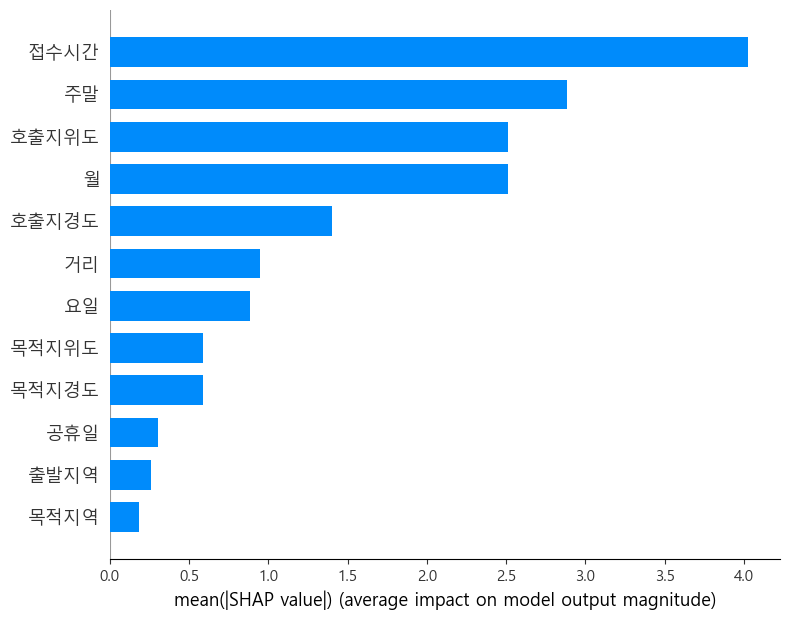

In [45]:
# SHAP 값의 요약 그래프
shap.summary_plot(shap_values, X_sample, plot_type="bar")

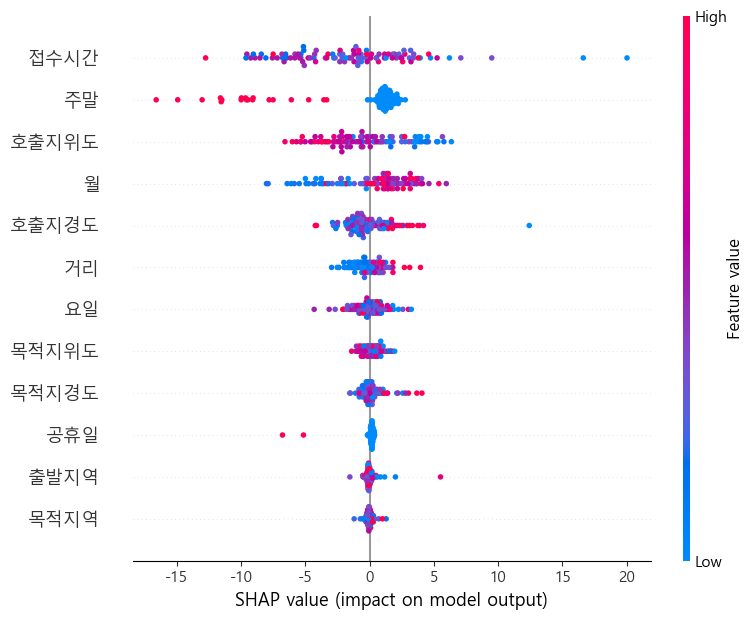

In [46]:
# 상세 SHAP 요약 그래프
shap.summary_plot(shap_values, X_sample)

In [47]:
# 각 피처에 대한 평균 절대 SHAP 값 계산
shap_importance = pd.DataFrame(list(zip(X_sample.columns, np.abs(shap_values).mean(axis=0))), columns=['Feature', 'SHAP Importance'])
shap_importance = shap_importance.sort_values(by='SHAP Importance', ascending=False)

In [48]:
# 상위 피처 선택(중복 제거)
top_features = shap_importance['Feature'].drop_duplicates().head(8).values
print("SHAP 값 기반 상위 피처: ", top_features)

SHAP 값 기반 상위 피처:  ['접수시간' '주말' '호출지위도' '월' '호출지경도' '거리' '요일' '목적지위도']


In [49]:
# 선택된 피처로 최종 데이터셋 생성
X_selected = X_encoded[top_features]

### 모델 학습 및 평가

In [50]:
# 선택된 피처로 학습 데이터와 테스트 데이터 재생성
X_selected_train = X_train[top_features]
X_selected_test = X_test[top_features]

In [51]:
# 새로운 모델 초기화 및 학습
selected_model = RandomForestRegressor(n_estimators=100, random_state=42)
selected_model.fit(X_selected_train, Y_train)

RandomForestRegressor(random_state=42)

In [52]:
# 모델 평가
train_score = selected_model.score(X_selected_train, Y_train)
test_score = selected_model.score(X_selected_test, Y_test)

print("Train Score: ", train_score)
print("Test Score: ", test_score)

Train Score:  0.7920277883326833
Test Score:  0.23250398846940012


- 모델의 학습 점수와 테스트 점수 간의 차이가 상당히 큼
- 모델이 학습 데이터에 과적합(overfitting)되어 테스트 데이터에서의 일반화 성능이 떨어짐

### 7가지 기본 모델 학습 및 평가

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 모델 리스트
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Score", "Test Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    train_score = model.score(X_selected_train, Y_train)
    test_score = model.score(X_selected_test, Y_test)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_score, test_score]], columns=["Model", "Train Score", "Test Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

C:\Users\user\AppData\Local\Temp\ipykernel_12912\2883513281.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Train Score,Test Score
0,Linear Regression,0.058141,0.056003
1,Ridge Regression,0.058141,0.056003
2,Lasso Regression,0.025105,0.024330
3,ElasticNet Regression,0.026666,0.025933
4,Decision Tree Regression,0.863460,-0.222287
5,Random Forest Regression,0.793208,0.223985
6,Gradient Boosting Regression,0.233822,0.233902


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train R2", "Test R2", "Train MSE", "Test MSE", "Train MAE", "Test MAE"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    
    # 예측
    y_train_pred = model.predict(X_selected_train)
    y_test_pred = model.predict(X_selected_test)
    
    # R2 계산
    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)
    
    # MSE 계산
    train_mse = mean_squared_error(Y_train, y_train_pred)
    test_mse = mean_squared_error(Y_test, y_test_pred)
    
    # MAE 계산
    train_mae = mean_absolute_error(Y_train, y_train_pred)
    test_mae = mean_absolute_error(Y_test, y_test_pred)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_r2, test_r2, train_mse, test_mse, train_mae, test_mae]], 
                              columns=["Model", "Train R2", "Test R2", "Train MSE", "Test MSE", "Train MAE", "Test MAE"])
    results = pd.concat([results, result_row], ignore_index=True)

print(results)

C:\Users\user\AppData\Local\Temp\ipykernel_12912\805031591.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


                          Model  Train R2   Test R2   Train MSE    Test MSE  \
0             Linear Regression  0.058141  0.056003  420.240753  423.737044   
1              Ridge Regression  0.058141  0.056003  420.240753  423.737042   
2              Lasso Regression  0.025105  0.024330  434.980875  437.954352   
3         ElasticNet Regression  0.026666  0.025933  434.284108  437.234848   
4      Decision Tree Regression  0.863460 -0.222287   60.921804  548.654835   
5      Random Forest Regression  0.793208  0.223985   92.266909  348.334067   
6  Gradient Boosting Regression  0.233822  0.233902  341.854912  343.882861   

   Train MAE   Test MAE  
0  15.879993  15.930169  
1  15.879995  15.930171  
2  16.359431  16.405368  
3  16.348701  16.394815  
4   3.489879  16.819524  
5   6.708826  13.730098  
6  14.053951  14.083984  


In [ ]:
results

,Model,Train R2,Test R2,Train MSE,Test MSE,Train MAE,Test MAE
0,Linear Regression,0.058141,0.056003,420.240753,423.737044,15.879993,15.930169
1,Ridge Regression,0.058141,0.056003,420.240753,423.737042,15.879995,15.930171
2,Lasso Regression,0.025105,0.024330,434.980875,437.954352,16.359431,16.405368
3,ElasticNet Regression,0.026666,0.025933,434.284108,437.234848,16.348701,16.394815
4,Decision Tree Regression,0.863460,-0.222287,60.921804,548.654835,3.489879,16.819524
5,Random Forest Regression,0.793208,0.223985,92.266909,348.334067,6.708826,13.730098
6,Gradient Boosting Regression,0.233822,0.233902,341.854912,343.882861,14.053951,14.083984


- 과적합 방지 : 교차검증

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# 모델 리스트
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "XGBoost Regression": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    train_score = model.score(X_selected_train, Y_train)
    test_score = model.score(X_selected_test, Y_test)
    cv_scores = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='r2')
    cv_mean_score = np.mean(cv_scores)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_score, test_score, cv_mean_score]], columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])
    results = pd.concat([results, result_row], ignore_index=True)

print(results)

C:\Users\user\AppData\Local\Temp\ipykernel_12912\3013380384.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


                          Model  Train Score  Test Score  \
0              Ridge Regression     0.058141    0.056003   
1              Lasso Regression     0.057604    0.055504   
2         ElasticNet Regression     0.055027    0.053082   
3      Decision Tree Regression     0.150244    0.149772   
4      Random Forest Regression     0.153937    0.153242   
5  Gradient Boosting Regression     0.273108    0.268118   
6            XGBoost Regression     0.271217    0.268198   

   Cross-Validation Score  
0                0.058105  
1                0.057573  
2                0.054997  
3                0.149674  
4                0.153375  
5                0.266472  
6                0.266384  


In [ ]:
results

,Model,Train Score,Test Score,Cross-Validation Score
0,Ridge Regression,0.058141,0.056003,0.058105
1,Lasso Regression,0.057604,0.055504,0.057573
2,ElasticNet Regression,0.055027,0.053082,0.054997
3,Decision Tree Regression,0.150244,0.149772,0.149674
4,Random Forest Regression,0.153937,0.153242,0.153375
5,Gradient Boosting Regression,0.273108,0.268118,0.266472
6,XGBoost Regression,0.271217,0.268198,0.266384


In [54]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# 모델 리스트
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "XGBoost Regression": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    train_score = model.score(X_selected_train, Y_train)
    test_score = model.score(X_selected_test, Y_test)
    cv_scores = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='r2')
    cv_mean_score = np.mean(cv_scores)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_score, test_score, cv_mean_score]], columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

C:\Users\user\AppData\Local\Temp\ipykernel_18724\271543622.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Train Score,Test Score,Cross-Validation Score
0,Ridge Regression,0.078367,0.077061,0.078329
1,Lasso Regression,0.077760,0.076510,0.077721
2,ElasticNet Regression,0.074563,0.073403,0.074528
3,Decision Tree Regression,0.153894,0.153998,0.151416
4,Random Forest Regression,0.154971,0.155171,0.155030
5,Gradient Boosting Regression,0.271268,0.268038,0.268182
6,XGBoost Regression,0.272033,0.269433,0.268920


- 7가지 모델 + 신경망 추가

In [ ]:
from sklearn.neural_network import MLPRegressor

# 모델 리스트
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "XGBoost Regression": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "Neural Network Regression": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train R2", "Test R2", "Train MSE", "Test MSE", "Train MAE", "Test MAE", "Cross-Validation Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    
    # 예측
    y_train_pred = model.predict(X_selected_train)
    y_test_pred = model.predict(X_selected_test)
    
    # R2 계산
    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)
    
    # MSE 계산
    train_mse = mean_squared_error(Y_train, y_train_pred)
    test_mse = mean_squared_error(Y_test, y_test_pred)
    
    # MAE 계산
    train_mae = mean_absolute_error(Y_train, y_train_pred)
    test_mae = mean_absolute_error(Y_test, y_test_pred)
    
    # 교차 검증 점수 계산
    cv_scores = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='r2')
    cv_mean_score = np.mean(cv_scores)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_r2, test_r2, train_mse, test_mse, train_mae, test_mae, cv_mean_score]], 
                              columns=["Model", "Train R2", "Test R2", "Train MSE", "Test MSE", "Train MAE", "Test MAE", "Cross-Validation Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

C:\Users\user\AppData\Local\Temp\ipykernel_12912\223659159.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib

,Model,Train R2,Test R2,Train MSE,Test MSE,Train MAE,Test MAE,Cross-Validation Score
0,Ridge Regression,0.058141,0.056003,420.240753,423.737042,15.879995,15.930171,0.058105
1,Lasso Regression,0.057604,0.055504,420.480309,423.961111,15.905850,15.955347,0.057573
2,ElasticNet Regression,0.055027,0.053082,421.630175,425.048110,15.958512,16.007739,0.054997
3,Decision Tree Regression,0.150244,0.149772,379.146077,381.646478,14.860274,14.900229,0.149674
4,Random Forest Regression,0.153937,0.153242,377.498373,380.089049,14.839138,14.880456,0.153375
5,Gradient Boosting Regression,0.273108,0.268118,324.325981,328.523824,13.583238,13.636036,0.266472
6,XGBoost Regression,0.271217,0.268198,325.169863,328.488194,13.596920,13.643660,0.266384
7,Neural Network Regression,0.291020,0.280039,316.334394,323.172941,13.411169,13.526215,0.265040


- standard scaler 사용해보기

In [ ]:
top_features

array(['접수시간', '주말', '월', '호출지위도', '호출지경도', '요일', '목적지위도', '목적지경도'],
      dtype=object)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.756470,0.599642,-0.131569,0.042423,-0.788826,1.229813,-0.640378,1.435211,-0.413294,-0.159632,0.868373,0.836009
1,-0.204418,-0.306930,1.066441,-0.344574,0.170146,-1.721638,0.019846,-0.512392,-0.413294,-0.159632,0.309887,-0.837052
2,-1.341237,-1.213503,-1.329579,-0.602572,0.810578,0.911233,1.683318,1.253285,-0.413294,-0.159632,-0.527842,0.278322
3,-0.218179,-0.306930,1.066441,0.816418,-0.249636,-1.369300,0.219596,-1.426780,-0.413294,-0.159632,-0.527842,-0.837052
4,0.171331,-0.004739,0.267768,0.171422,-1.197143,-1.233608,-1.039045,-0.444842,-0.413294,-0.159632,-1.365572,-0.279365
...,...,...,...,...,...,...,...,...,...,...,...,...
521059,0.419387,0.297452,0.068100,0.171422,-0.845267,-0.254598,-1.148833,-0.038771,-0.413294,-0.159632,-0.248599,0.836009
521060,-1.285436,-1.213503,-1.129910,-0.602572,1.882962,1.308311,1.675155,2.145412,-0.413294,-0.159632,0.589130,-0.837052
521061,0.315911,0.297452,0.068100,0.171422,-0.845267,-0.254598,-1.148833,-0.038771,-0.413294,-0.159632,-0.248599,-1.394739
521062,0.443851,0.297452,-0.930242,-0.473573,0.870547,-0.826534,0.934631,-0.879775,-0.413294,-0.159632,0.868373,0.836009


In [ ]:
data_encoded.columns.to_list()

['접수일시',
 '월',
 '출발지역',
 '목적지역',
 '호출지경도',
 '호출지위도',
 '목적지경도',
 '목적지위도',
 '주말',
 '공휴일',
 '접수시간',
 '요일']

In [ ]:
X_train_scaled.columns = data_encoded.columns.to_list()
X_train_scaled

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일
0,0.756470,0.599642,-0.131569,0.042423,-0.788826,1.229813,-0.640378,1.435211,-0.413294,-0.159632,0.868373,0.836009
1,-0.204418,-0.306930,1.066441,-0.344574,0.170146,-1.721638,0.019846,-0.512392,-0.413294,-0.159632,0.309887,-0.837052
2,-1.341237,-1.213503,-1.329579,-0.602572,0.810578,0.911233,1.683318,1.253285,-0.413294,-0.159632,-0.527842,0.278322
3,-0.218179,-0.306930,1.066441,0.816418,-0.249636,-1.369300,0.219596,-1.426780,-0.413294,-0.159632,-0.527842,-0.837052
4,0.171331,-0.004739,0.267768,0.171422,-1.197143,-1.233608,-1.039045,-0.444842,-0.413294,-0.159632,-1.365572,-0.279365
...,...,...,...,...,...,...,...,...,...,...,...,...
521059,0.419387,0.297452,0.068100,0.171422,-0.845267,-0.254598,-1.148833,-0.038771,-0.413294,-0.159632,-0.248599,0.836009
521060,-1.285436,-1.213503,-1.129910,-0.602572,1.882962,1.308311,1.675155,2.145412,-0.413294,-0.159632,0.589130,-0.837052
521061,0.315911,0.297452,0.068100,0.171422,-0.845267,-0.254598,-1.148833,-0.038771,-0.413294,-0.159632,-0.248599,-1.394739
521062,0.443851,0.297452,-0.930242,-0.473573,0.870547,-0.826534,0.934631,-0.879775,-0.413294,-0.159632,0.868373,0.836009


- 과적합 방지 : StandardScaler + 교차검증 사용

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# 타겟 변수와 특징 변수 분리
target_variable = '총대기시간(분)'  # 예시로 설정한 타겟 변수
X = data_encoded
Y = Y

# 학습 및 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# StandardScaler 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = data_encoded.columns.to_list()
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = data_encoded.columns.to_list()

X_train_scaled = X_train_scaled[top_features]
X_test_scaled = X_test_scaled[top_features]

# 모델 리스트
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "XGBoost Regression": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    train_score = model.score(X_train_scaled, Y_train)
    test_score = model.score(X_test_scaled, Y_test)
    cv_scores = cross_val_score(model, X_train_scaled, Y_train, cv=5, scoring='r2')
    cv_mean_score = np.mean(cv_scores)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_score, test_score, cv_mean_score]], columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])
    results = pd.concat([results, result_row], ignore_index=True)

print(results)

C:\Users\user\AppData\Local\Temp\ipykernel_21296\2798714548.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


                          Model  Train Score  Test Score  \
0              Ridge Regression     0.058141    0.056003   
1              Lasso Regression     0.057920    0.055777   
2         ElasticNet Regression     0.057849    0.055727   
3      Decision Tree Regression     0.150244    0.149772   
4      Random Forest Regression     0.153936    0.153242   
5  Gradient Boosting Regression     0.273108    0.268115   
6            XGBoost Regression     0.271217    0.268198   

   Cross-Validation Score  
0                0.058105  
1                0.057885  
2                0.057816  
3                0.149674  
4                0.153375  
5                0.266476  
6                0.266384  


In [ ]:
results

,Model,Train Score,Test Score,Cross-Validation Score
0,Ridge Regression,0.058141,0.056003,0.058105
1,Lasso Regression,0.057920,0.055777,0.057885
2,ElasticNet Regression,0.057849,0.055727,0.057816
3,Decision Tree Regression,0.150244,0.149772,0.149674
4,Random Forest Regression,0.153936,0.153242,0.153375
5,Gradient Boosting Regression,0.273108,0.268115,0.266476
6,XGBoost Regression,0.271217,0.268198,0.266384


### 과적합 줄이기
1. 교차 검증 (Cross-Validation) 사용 *
2. 규제 (Regularization) 사용 *
3. 모델 복잡도 줄이기 
4. 앙상블 기법 사용 
5. 특성 선택 (Feature Selection) *
6. 드롭아웃 사용 (신경망의 경우)

### Gradient Boosting + Genetic 튜닝

In [ ]:
from tpot import TPOTRegressor

# TPOTRegressor 사용하여 하이퍼파라미터 튜닝
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2, config_dict={
    'sklearn.ensemble.GradientBoostingRegressor': {
        'n_estimators': range(50, 201),  # 50에서 200까지의 값
        'max_depth': range(3, 8),  # 3에서 7까지의 값
        'learning_rate': np.arange(0.01, 0.21, 0.01),  # 0.01에서 0.2까지의 값
        'subsample': np.arange(0.6, 1.1, 0.1),  # 0.6에서 1.0까지의 값
        'min_samples_split': range(2, 11),  # 2에서 10까지의 값
        'min_samples_leaf': range(1, 5),  # 1에서 4까지의 값
        'max_features': ['sqrt', 'log2', None]  # 선택 가능한 특성
    }
})

tpot.fit(X_selected_train, Y_train)

# 최적 모델로 테스트 성능 평가
y_train_pred = tpot.predict(X_selected_train)
y_test_pred = tpot.predict(X_selected_test)

train_r2 = r2_score(Y_train, y_train_pred)
test_r2 = r2_score(Y_test, y_test_pred)
train_mse = mean_squared_error(Y_train, y_train_pred)
test_mse = mean_squared_error(Y_test, y_test_pred)
train_mae = mean_absolute_error(Y_train, y_train_pred)
test_mae = mean_absolute_error(Y_test, y_test_pred)

print(f"Train R2: {train_r2}, Test R2: {test_r2}")
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

# 교차 검증 점수 계산
cv_scores = cross_val_score(tpot.fitted_pipeline_, X_selected_train, Y_train, cv=5, scoring='r2')
cv_mean_score = np.mean(cv_scores)
print(f"Cross-Validation R2: {cv_mean_score}")

# 최적의 파이프라인 출력
print(tpot.fitted_pipeline_)

### XGBoost Regression + Genetic 튜닝

In [ ]:
import xgboost as xgb

# TPOTRegressor 사용하여 하이퍼파라미터 튜닝
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2, config_dict={
    'xgboost.XGBRegressor': {
        'n_estimators': range(50, 201),  # 50에서 200까지의 값
        'max_depth': range(3, 8),  # 3에서 7까지의 값
        'learning_rate': np.arange(0.01, 0.21, 0.01),  # 0.01에서 0.2까지의 값
        'subsample': np.arange(0.6, 1.1, 0.1),  # 0.6에서 1.0까지의 값
        'min_child_weight': range(1, 11),  # 1에서 10까지의 값
        'gamma': np.arange(0, 0.5, 0.05),  # 0에서 0.5까지의 값
        'colsample_bytree': np.arange(0.6, 1.1, 0.1)  # 0.6에서 1.0까지의 값
    }
})

tpot.fit(X_selected_train, Y_train)

# 최적 모델로 테스트 성능 평가
y_train_pred = tpot.predict(X_selected_train)
y_test_pred = tpot.predict(X_selected_test)

train_r2 = r2_score(Y_train, y_train_pred)
test_r2 = r2_score(Y_test, y_test_pred)
train_mse = mean_squared_error(Y_train, y_train_pred)
test_mse = mean_squared_error(Y_test, y_test_pred)
train_mae = mean_absolute_error(Y_train, y_train_pred)
test_mae = mean_absolute_error(Y_test, y_test_pred)

print(f"Train R2: {train_r2}, Test R2: {test_r2}")
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

# 교차 검증 점수 계산
cv_scores = cross_val_score(tpot.fitted_pipeline_, X_selected_train, Y_train, cv=5, scoring='r2')
cv_mean_score = np.mean(cv_scores)
print(f"Cross-Validation R2: {cv_mean_score}")

# 최적의 파이프라인 출력
print(tpot.fitted_pipeline_)